<h2>Time series from a 2-ppm trial</h2>

In [1]:
# Some imports to stop some annoying yellow underlines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Very important line to run the setup notebook!!!
%run do_plot_setup.ipynb

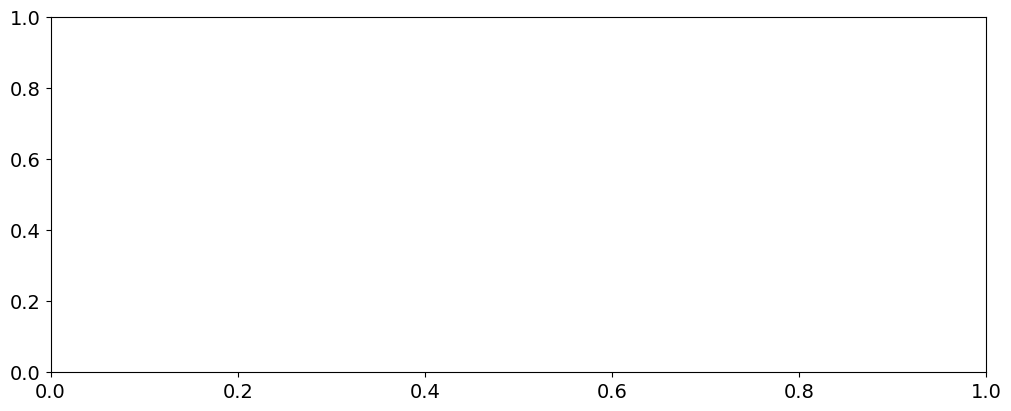

In [3]:
(fig,ax)=plt.subplots(1,1,figsize=(figure_width,4))

plt.savefig('exported_images/time_series_2_ppm.png', bbox_inches='tight',dpi=300)
plt.show()